In [8]:
from os import fdopen
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statistics as stat
from PIL import Image
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import tensorflow as tf # tensorflow 2.0
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
labels = pd.read_csv("../../Xray_TeethLabels_Simple.csv",index_col=0)
Ylabels = labels[5:]
metaY = labels[:3]

X = {}
Y = {}
Z = {}
count1 = 0
count2 = 0
count3 = 0
for picFilename in glob.glob("../../processed2/processed/*"):
    patNumber = picFilename.split('/')[4].split('_')[0]
    toothNumber = picFilename.split('/')[4].split('_')[1].split('.')[0]
    im = Image.open(picFilename)
    '''if int(metaY.loc['Age',patNumber]) < 25:
        count1+=1
        if 'Age1' in X.keys():
            X['Age1'].append(np.array(im))
            Y['Age1'].append(1 if Ylabels.loc[toothNumber,patNumber] == 'Yes' else 0)
        else:
            X['Age1'] = []
            X['Age1'].append(np.array(im))
            Y['Age1'] = [1 if Ylabels.loc[toothNumber,patNumber] == 'Yes' else 0]
            
    if int(metaY.loc['Age',patNumber]) < 40 and int(metaY.loc['Age',patNumber]) > 25:
        count2+=1
        if 'Age2' in X.keys():
            X['Age2'].append(np.array(im))
            Y['Age2'].append(1 if Ylabels.loc[toothNumber,patNumber] == 'Yes' else 0)
            #Z['Age2'].append(picFilename)
        else:
            X['Age2'] = []
            X['Age2'].append(np.array(im))
            Y['Age2'] = [1 if Ylabels.loc[toothNumber,patNumber] == 'Yes' else 0]
            #Z['Age2'].append(picFilename)'''
    if int(metaY.loc['Age',patNumber]) > 40:
        count3+=1
        if 'Age3' in X.keys():
            X['Age3'].append(np.array(im))
            Y['Age3'].append(1 if Ylabels.loc[toothNumber,patNumber] == 'Yes' else 0)
        else:
            X['Age3'] = []
            X['Age3'].append(np.array(im))
            Y['Age3'] = [1 if Ylabels.loc[toothNumber,patNumber] == 'Yes' else 0]
            
print(count1)
print(count2)
print(count3)
#print(X)
for age in X.keys():
    ageX = np.array(X[age])
    ageY = Y[age]

    X_train, X_test, Y_train_original, Y_test_original = train_test_split(ageX, np.array(ageY), random_state = 100, test_size=0.20)

    Y_train = tf.keras.utils.to_categorical(Y_train_original, 2)
    Y_test = tf.keras.utils.to_categorical(Y_test_original, 2)

    #print(Y_test)
    print(Y_test.shape)

0
0
84
(17, 2)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPooling2D, Dropout
model = Sequential()
model.add(Conv2D(256, 5, activation='relu', input_shape=(500,500,3)))
model.add(MaxPooling2D())
model.add(Conv2D(128, 5, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
max_epochs = 5
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=max_epochs)
info = model.evaluate(X_test, Y_test)
print('Accuracy score for epoches ' + str(max_epochs) + ':', info[1])
predictions = (model.predict(X_test) > 0.5).astype(int)
pred = []
for prediction in predictions:
    i, = np.where(prediction == 1)
    pred.append(i[0])
print(classification_report(Y_test_original, pred))
tn, fp, fn, tp = confusion_matrix(Y_test_original, pred).ravel()
print(tn, fp, fn, tp)

Epoch 1/5
3/3 [==============================] - 125s 35s/step - loss: 0.6894 - accuracy: 0.7015 - val_loss: 0.6953 - val_accuracy: 0.6471
Epoch 2/5
3/3 [==============================] - 116s 32s/step - loss: 0.6729 - accuracy: 0.7761 - val_loss: 4.7232 - val_accuracy: 0.7059
Epoch 3/5
3/3 [==============================] - 110s 29s/step - loss: 2.6020 - accuracy: 0.6716 - val_loss: 0.7169 - val_accuracy: 0.5294
Epoch 4/5
3/3 [==============================] - 102s 30s/step - loss: 0.6166 - accuracy: 0.7313 - val_loss: 0.7282 - val_accuracy: 0.5294
Epoch 5/5
1/1 [==============================] - 5s 5s/step - loss: 0.8308 - accuracy: 0.5294
Accuracy score for epoches 5: 0.529411792755127
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.20      0.20      0.20         5

    accuracy                           0.53        17
   macro avg       0.43      0.43      0.43        17
weighted avg       0.53      0

In [19]:
print(Y_test)
print(Y_test.shape)
image = X_test[3]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
(17, 2)


In [20]:
%load_ext autoreload
%autoreload 2
import os,sys
import lime
from lime import lime_image

In [21]:
explainer = lime_image.LimeImageExplainer()

In [22]:
explanation = explainer.explain_instance(image.astype('double'), model.predict, top_labels=2, hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
from skimage.segmentation import mark_boundaries

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


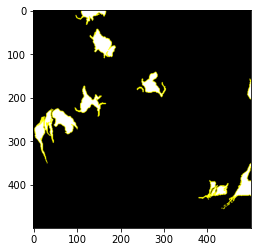

In [25]:
from matplotlib import pyplot as plt
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

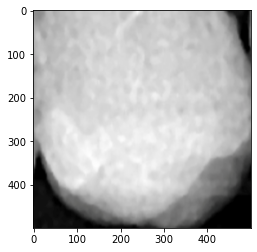

In [26]:
plt.imshow(image)